###Projekt iz kolegija "Neuronske mreže i duboko učenje"
##Usporedba više tipova klasifikatora(neuronskih mreža) na slikama prometnih znakova za brzinu

**Student: Luka Đurašinović**

**JMBAG: 0069064282**

**Nositelj kolegija: doc. dr. sc. Goran Oreški**

Autor dataseta: Daniil Deltsov

##Uvod

Kao temu izabrao sam usporedbu više klasifikatora (neuronskih mreža) i treniranje na skupu podataka tj. slika prometnih znakova za brzinu.

Prometne znakove za brzinu sam odabrao iz razloga što u periodu odabira teme sam taman završavao autoškolu, te mi je cijela ta tematika bila vrlo bliska, zanimljiva i aktualna.

Prvotno sam imao zamisao napraviti usporedbu između npr. K-NN klasifikatora i konvolucijskih mreža, ali daljnjim ponavljanjem i učenjem teorije sam uvidio da klasifikacija slika na linearnom klasifikatoru, NN klasifikatoru, K-NN klasifikatoru, kao i običnim neuronskim mrežama (bez konvolucijskih slojeva) jednostavno znatno zaostaje za treniranjem i testiranjem unutar konvolucijskih neuronskih mreža. Stoga sam na kraju odlučio da ću napraviti usporedbu efikasnosti više modela konvolucijskih neuronskih mreža pri čemu ću kreirati bar jednu vlastitu mrežu i napraviti usporedbu s bar jednim afirmiranim poznatim tipom konvolucijske mreže (npr. ResNet, VGG16...).

Na kraju sam tako kreirao tri vlastita modela neuronske mreže za navedeni skup podataka, a od poznatih mreža koristio sam model kreiran po uzoru na VGG16 mrežu.

##Priprema podataka

Svoj dataset sam preuzeo sa "Kaggle-a", stranice specijalizirane za machine learning koja sadrži pregršt besplatnih datasetova za preuzimanje (link za dataset je na kraju dokumenta u dokumentaciji). 

Autor mog dataseta je Daniil Deltsov, a sam dataset sadržavao se od: Meta foldera (folder sa prikazima slika šta koji od trening subfoldera sadržava), trening foldera (folder sa 204 klase tj. 204 različita tipa znaka i ukupno sa preko 90 000 slika prometnih znakova) i naravno testnog foldera koji se sastojao od 55 000 nerazvrstanih slika prometnih znakova. 

Kako su folderi izgledali prije sređivanja tj. izuzimanja isključivo slika prometnih znakova za brzinu vidi se u priloženim dokumentima projekta.

Priprema podataka je ustvari bila i najduži i najteži dio posla s obzirom da iako je trening skup bio uredno sortiran i lako se odvojilo 16 foldera sa prometnim znakovima za brzinu od ostatka trening skupa, kod testnog skupa to nije bio slučaj.

Naime kako je vidljivo iz slike sve slike testnog skupa bile su nasumično razbacane, te sam morao ručno brisati višak slika tj. znakove koji mi ne trebaju pri čemu sam obrisao oko 50 000 slika tj. ostao sam na 5500 slika testnog skupa koje je potom još dodatno moralo sortirati u 16 foldera s imenima klasa kako bi one odgovarale trening skupu. 

Nakon što sam to sve odradio mogao sam uploadati svoj sređeni dataset na Google Drive kako bi ga uspješno mogao koristiti u projektu. 

##Postavljanje Google Drive-a za dohvat podataka

Kako bi uspješno pozvao slike trening i testnog skupa u projekt morao sam iste uploadati na svoj Google Drive koji potom donjom naredbom importam unutar Google Colaba.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Postavljanje patha do trening i testnog direktorija

Nakon što je Google Drive uspješno importan na jednostavan način definiram puteve do trening i testne datoteke na njemu.

In [ ]:
train_dir = '/content/drive/MyDrive/Data_images/Trening' #putanja do trening direktorija
test_dir = '/content/drive/MyDrive/Data_images/Test' #putanja do testnog direktorija

##Ispisivanje sadržaja direktorija

Kako bi mogli pregledati sadržaj naša dva direktorija, moram uključiti "os library" koji je sastavni dio Colaba. Isti nam služi kako bi mogli pristupati i upravljati sadržajem učitanih datoteka. U donjem bloku koda tako sam ispisao sadržaje svojih trening i test direktorija, a potom i sadržaj dva poddirektorija unutar trening skupa, odnosno dvije klase sa znakovima za ograničenje brzine od 20km/h i 30km/h.

In [ ]:
import os

trening_fnames = os.listdir(train_dir) #dohvaćanje sadržaja trening direktorija
test_fnames = os.listdir(test_dir) #dohvaćanje sadržaja testnog direktorija

ogranicenje20_dir = '/content/drive/MyDrive/Data_images/Trening/Ogranicenje_20'
ogranicenje20_fnames = os.listdir(ogranicenje20_dir)

ogranicenje30_dir = '/content/drive/MyDrive/Data_images/Trening/Ogranicenje 30'
ogranicenje30_fnames = os.listdir(ogranicenje30_dir)

#-----------------------------------------------------------------
#                            ISPIS
#-----------------------------------------------------------------
print(trening_fnames)
print()
print(test_fnames)
print()
print(ogranicenje20_fnames[:10]) #prvih 10 slika u folderu
print()
print(ogranicenje30_fnames[:10]) #prvih 10 slika u folderu

['Prestanak preporucenja brzine', 'Ogranicenje_20', 'Ogranicenje 70', 'Ogranicenje 50', 'Prestanak zone ogranicenja brzine', 'Ogranicenje 80', 'Prestanak ogranicenja brzine', 'Ogranicenje 60', 'Preporucena brzina', 'Zona ogranicenja brzine', 'Ogranicenje 30', 'Ogranicenje 120', 'Dopustene brzine na prometnicama unutar drzave', 'Minimalna dopustena brzina', 'Ogranicenja brzine po trakama', 'Ogranicenje 100']

['Prestanak preporucenja brzine', 'Prestanak zone ogranicenja brzine', 'Prestanak ogranicenja brzine', 'Zona ogranicenja brzine', 'Ogranicenje 120', 'Preporucena brzina', 'Ogranicenje 20', 'Ogranicenje 80', 'Ogranicenje 50', 'Ogranicenja brzine po trakama', 'Ogranicenje 100', 'Ogranicenje 30', 'Ogranicenje 60', 'Ogranicenje 70', 'Dopustene brzine na prometnicama unutar drzave', 'Minimalna dopustena brzina']

['00000_00001_00001.png', '00000_00001_00015.png', '00000_00004_00028.png', '00000_00001_00002.png', '00000_00006_00013.png', '00000_00001_00016.png', '00000_00003_00029.png', 

Možemo doznati i koliko je slika tj. fileova u pojedinom direktoriju. To je učinjeno na iduće dvije linije koda gdje sam provjerio broj slika unutar dva foldera trening skupa.

In [ ]:
print('Ukupan broj trening slika znaka za Ograničenje 20: ', len(os.listdir(ogranicenje20_dir)))

print('Ukupan broj trening slika znaka za Ograničenje 30: ', len(os.listdir(ogranicenje30_dir)))

Ukupan broj trening slika znaka za Ograničenje 20:  203
Ukupan broj trening slika znaka za Ograničenje 30:  2213


##Dohvaćanje manjeg dijela slika iz trening skupa

Kako bi vidjeli kako izgleda naš sadržaj trening skupa (kao i testnog) dohvatio sam određeni broj slika iz dvije klase trening skupa i prikazao ih u njihovom izvornom obliku tj. kao slikovni file. 

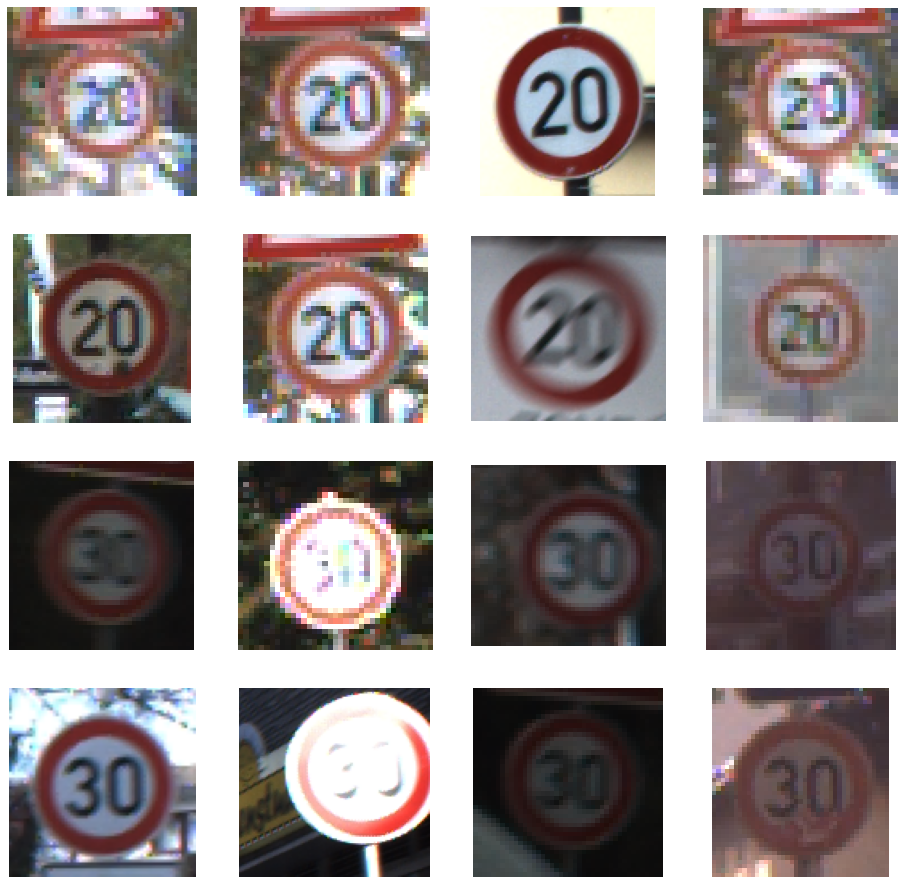

In [ ]:
%matplotlib inline

#Dohvaćanje potrebnih libraryja za plotanje slika/grafova
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#Parametri za naš graf, prikazati ćemo slike u 4x4 prikazu tj. u 4 reda i stupca
nrows = 4
ncols = 4

pic_index = 0 #index za iteriranje preko slika

fig = plt.gcf() #"plot - get current figure", ukoliko nema slike nova se kreira
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

#Dohvaćanje 8 slika iz svake od dvije klase
next_ogranicenje20_pix = [os.path.join(ogranicenje20_dir, fname)
                for fname in ogranicenje20_fnames[pic_index-8:pic_index]
                ]

next_ogranicenje30_pix = [os.path.join(ogranicenje30_dir, fname)
                for fname in ogranicenje30_fnames[pic_index-8:pic_index]
                ]

for i, img_path in enumerate(next_ogranicenje20_pix+next_ogranicenje30_pix):
  #postavljamo subplot kako bi se sve slike mogle istovremeno prikazati
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off') #kako se ne bi prikazivale osi ili obrubi

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

##Kreiranje prvog modela

Kako bi mogli trenirati naš skup podataka potrebno je kreirati neuronsku mrežu s određenim brojem slojeva. Kao što sam rekao u uvodu, odlučio sam se testirati mrežu na više različitih konvolucijskih neuronskih mreža pošto iz teorije znamo da su ponajbolje u slučaju klasifikacije slika. U donjem bloku koda tako kreiram prvi najjednostavniji oblik konvolucijske neuronske mreže.

**KARAKTERISTIKE MREŽE:**

Ulaz slike: 120,120,3

Conv sloj: filter = 16x(3x3)

MaxPool sloj: filter=(2x2)

Conv sloj: filter =32(3x3)

MaxPool sloj: filter=(2x2)

Conv sloj: filter =64(3x3)

MaxPool sloj: filter=(2x2)

Flatten: pretvara konvolucijski sloj u jedan vektor

Dense: skriveni sloj sa 512 neurona

FC sloj: 16 output neurona pošto imamo 16 klasa u treningu/testu

*Slike su skalirane sve na veličinu 120x120x3 s obzirom da unutar trening/testnog skupa nisu sve slike iste veličine (3 bytea za slike u boji)... Dodatna skalacija je odrađena kasnije.

**Na svakom sloju koristi se "Relu" kao aktivacijska funkcija osim na posljednjem output sloju gdje koristim "Softmax".

In [ ]:
#Kreiranje modela

#Pozivamo sve potrebne libraryje (koji će nam trebati i kasnije)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

#kreiranje modela (prvo dodajemo par konvolucijskih slojeva, potom "flattenamo")
#rezultat kako bi ga predali u dense slojeve

model = tf.keras.models.Sequential([
    #slike su veličine 120x120 (kako smo pretvorili) sa 3 bytea(tj u boji)
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(120,120,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #flattenamo rezultate kako bi ih predali Dense sloju
    tf.keras.layers.Flatten(),
    #skriveni sloj sa 512 neurona
    tf.keras.layers.Dense(512, activation='relu'),
    #16 output neurona pošto imamo 16 klasa u trening/testu
    tf.keras.layers.Dense(16, activation='softmax')
])

model.summary() #ispisuje nam podatke o kreiranoj mreži

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0

U donjem bloku koda postavljam željeni optimizator (u ovom slučaju "Adam"), learning rate, funkciju gubitka, te metriku koju želim da naš model prati i mjeri za vrijeme treninga. 

U ovom slučaju koristim Adam kao optimizator, a za loss funkciju "Categorical Crossentropy loss". U većini slučajeva koristiti ću ta dva hiperparametra, ali u nekim kasnijim modelima koristiti ću i RMSprop za optimizator, kao i "Sparse Categorical Crossentropy" za loss funkciju.

In [ ]:
from tensorflow.keras.optimizers import Adam
from keras import optimizers
from tensorflow.keras.optimizers import RMSprop

optimizer = keras.optimizers.Adam(learning_rate=1e-3)
loss_func = keras.losses.CategoricalCrossentropy()

model.compile(optimizer = optimizer,
              loss = loss_func,
              metrics=['accuracy']) #mjerenje točnosti

##Dodatna priprema (obrada) podataka

Prije početka treninga moram postaviti "data generatore" koji će učitavati slike u datotekama i "hraniti" mrežu sa njihovim vrijednostima. Potrebno je kreirati generator za trening slike i za validacijske slike. Generatori će sadržavati batch_sizeve veličine 128 i veličina slika 120x120. 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#sve slike biti će reskalirane za 1/255 kako bi odgovarale u vrijednostima
train_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size =128,
                                                    class_mode ='categorical', #pošto imamo 16 klasa ovo je najprimjereniji class mode
                                                    target_size = (120, 120))

validation_generator = test_datagen.flow_from_directory(test_dir,
                                                        batch_size=128,
                                                        class_mode = 'categorical',
                                                        target_size = (120,120))

Found 15032 images belonging to 16 classes.
Found 5500 images belonging to 16 classes.


##Trening 1

Pošto je sve postavljeno, konačno se može pokrenuti treniranje modela. Pozivam generatore, definiram korake po epohi, broj epoha kao i validacijske korake i pokrećem model. 

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=40, #koliko puta će se batch dodijeliti mreži u svakoj epohi
                    epochs=10,
                    validation_steps=20, #isto kao i steps per epoch samo na testnim podacima
                    )

Epoch 1/10
40/40 [==============================] - 213s 5s/step - loss: 1.9969 - accuracy: 0.2852 - val_loss: 2.1893 - val_accuracy: 0.2859
Epoch 2/10
40/40 [==============================] - 191s 5s/step - loss: 1.5551 - accuracy: 0.4164 - val_loss: 2.2953 - val_accuracy: 0.3359
Epoch 3/10
40/40 [==============================] - 166s 4s/step - loss: 1.2428 - accuracy: 0.5719 - val_loss: 2.3153 - val_accuracy: 0.3484
Epoch 4/10
40/40 [==============================] - 147s 4s/step - loss: 0.8227 - accuracy: 0.7297 - val_loss: 2.9751 - val_accuracy: 0.3594
Epoch 5/10
40/40 [==============================] - 145s 4s/step - loss: 0.5744 - accuracy: 0.8203 - val_loss: 3.7122 - val_accuracy: 0.3484
Epoch 6/10
40/40 [==============================] - 128s 3s/step - loss: 0.4106 - accuracy: 0.8672 - val_loss: 5.1379 - val_accuracy: 0.3609
Epoch 7/10
40/40 [==============================] - 113s 3s/step - loss: 0.3846 - accuracy: 0.8828 - val_loss: 5.1042 - val_accuracy: 0.4141
Epoch 8/10
40

##Komentar rezultata

Vidimo da je došlo do tzv. "Overfittinga" tj. trening skup je vrlo brzo došao do malog gubitka i izrazito velike točnosti dok gubitak na validacijskom (testnom) skupu stalno raste, a točnost stagnira tj. vrti se oko istih vrijednosti. To će biti lakše za protumačiti na kasnijim grafovima, zasada je bitno uvidjeti taj problem i probati ga riješiti izmjenom postojećeg modela/kreiranjem novog.

##Vizualizacija promjene slike prolaskom kroz ConvNet

Izvršavanjem donjeg bloka koda prikazati će se jedna od slika iz skupa trening slika za ograničenje 20 ili ograničenje 30, te će se na toj slici vidjeti kako se ona mijenja prolaskom kroz konvolucijsku mrežu tj. kako se mreža "trenira" i sažima sliku na sve manje vrijednosti koje pritom nose više bitnih informacija i omogućuju lakšu i bolju klasifikaciju na testnom skupu. Prikazani su isključivo Conv i MaxPool slojevi pošto su nam oni u ovoj priči ustvari najbitniji. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in true_divide


IndexError: ignored

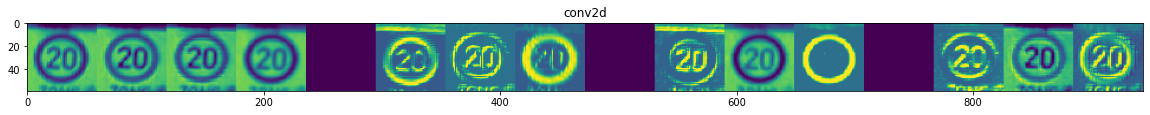

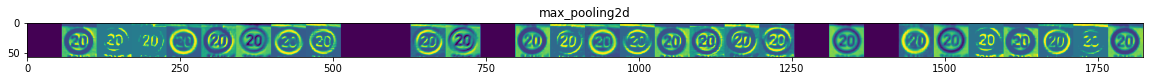

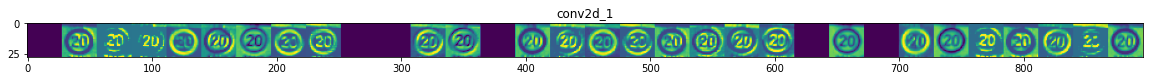

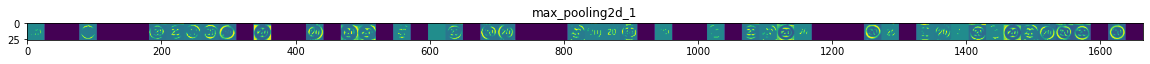

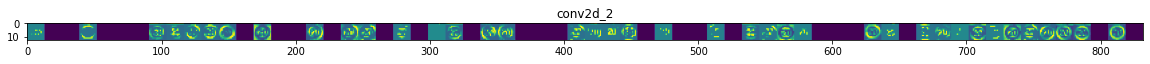

In [ ]:
import numpy as np
import random
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, load_img

#Definirati će se novi model koji će uzeti image kao input, a kao output
#će prikazati reprezentaciju slike za sve slojeve u prethodnom modelu

successive_outputs = [layer.output for layer in model.layers[1:]]

visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

#pripremiti ćemo random input image znaka za ograničenje 20 ili ograničenje 30 iz training seta
ogranicenje20_img_files = [os.path.join(ogranicenje20_dir, f) for f in ogranicenje20_fnames]
ogranicenje30_img_files = [os.path.join(ogranicenje30_dir, f) for f in ogranicenje30_fnames]

img_path = random.choice(ogranicenje20_img_files + ogranicenje30_img_files)
img = load_img(img_path, target_size=(120,120)) 

x = img_to_array(img) #numpy array oblika (120,120,3)
x = x.reshape((1,) + x.shape) #numpy array oblika (1,120,120,3)

x /= 255.0 #reskaliranje za 1/255

#Sada propustimo našu sliku kroz našu mrežu pritom primajući sve međuslojne reprezentacije te slike

successive_feature_maps = visualization_model.predict(x)

#ovo su imena slojeva, pa ih možemo koristiti kao dio grafa
layer_names = [layer.name for layer in model.layers]

#Prikaz reprezentacija kroz slojeve
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    #radimo ovo samo za conv/maxpool slojeve
    n_features = feature_map.shape[-1]
    size = feature_map.shape[1]
    
    #"rasprostiranje" slika u matrici
    display_grid = np.zeros((size, size * n_features))

  #postprocesiranje reprezentacija kako bi bile prikazive
  for i in range(n_features):
    x = feature_map[0, :, :, i]
    x -= x.mean()
    x /= x.std ()
    x *= 64
    x += 128
    x = np.clip(x, 0, 255).astype('uint8')
    display_grid[:, i * size : (i + 1) * size] = x #raširi svaki filter u horizontalni grid

  #------------------------
  # Prikaz grida
  #------------------------

  scale = 20. / n_features
  plt.figure (figsize=(scale * n_features, scale))
  plt.title (layer_name)
  plt.grid (False)
  plt.imshow (display_grid, aspect='auto', cmap='viridis')

##Grafovi točnosti i gubitka za "Model 1" i komentar

Donji kod nam služi za plotanje grafova za točnost i gubitak prilikom treninga i testa prvog kreiranog modela.

Na grafu za točnost vidimo kako trening točnost konstantno i ubrzano raste do nekog svog maksimuma, dok točnost prilikom testa doseže najveću točnost od oko 40% klasificiranja i na tome staje i vrti se oko te vrijednosti. Nesrazmjer ta dva odnosa i brzina kojom je trening skup došao do visoke točnosti označava "overfitting" tj. da trebamo izvesti određene promjene na našem modelu.

Graf gubitka je dijametralno suprotan grafu točnosti što je sasvim normalno i logično u ovom slučaju, tj. gubitak kod testa stalno raste i izrazito je visok, dok na trening skupu on pada i ide prema minimumu.

<function matplotlib.pyplot.show(*args, **kw)>

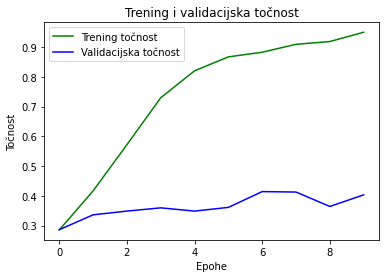

In [ ]:
#Evaluiranje točnosti za model

#vraćamo listu rezultata na trening i testnim podacima za svaku epohu

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc)) #za dobivanje broja epoha u prethodnom testu

#Plotanje trening i testne točnosti po epohi
plt.plot(epochs, acc, 'g', label='Trening točnost')
plt.plot(epochs, val_acc, 'b', label='Validacijska točnost')
plt.title('Trening i validacijska točnost')
plt.xlabel('Epohe')
plt.ylabel('Točnost')
plt.legend()
plt.show


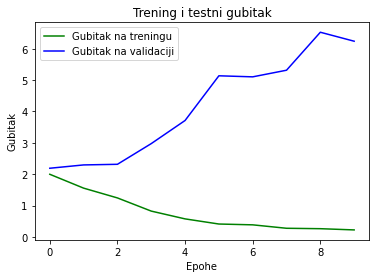

In [ ]:
#Evaluiranje gubitka za model

#vraćamo listu rezultata na trening i testnim podacima za svaku epohu

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#Plotanje trening i testnog gubitka po epohi
plt.plot(epochs, loss, 'g', label='Gubitak na treningu')
plt.plot(epochs, val_loss, 'b', label='Gubitak na validaciji')
plt.title('Trening i testni gubitak')
plt.xlabel('Epohe')
plt.ylabel('Gubitak')
plt.legend()
plt.show()

##Model 2

Za drugi model proširio sam tj. produbio prethodni model poduplavanjem svakog konvolucijskog sloja, te sam dodao tzv. "dropout" tj. izostavljanje određenog postotka slika prolaskom kroz model kako bi spriječio pretreniranost istog. Dense (hidden) sloj sam također prepolovio sa 512 neurona na 256, dok sam aktivacijske funkcije zadržao. 

In [ ]:
#Kreiranje modela #2

import tensorflow as tf

#kreiranje modela (prvo dodajemo par konvolucijskih slojeva, potom "flattenamo")
#rezultat kako bi ga predali u dense slojeve
#poduplao konvolucijske slojeve i dodao dropout, smanjio dense sloj

model = tf.keras.models.Sequential([
    #slike su veličine 120x120 (kako smo pretvorili) sa 3 bytea(tj u boji)
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(120,120,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    #flattenamo rezultate kako bi ih predali Dense sloju
    tf.keras.layers.Flatten(),
    #skriveni sloj sa 256 neurona
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    #16 output neurona pošto imamo 16 klasa u trening/testu
    tf.keras.layers.Dense(16, activation='softmax')
])

model.summary() #ispisuje nam podatke o kreiranoj mreži

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 118, 118, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 59, 59, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 59, 59, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 57, 57, 32)        4640      
                                                                 
 conv2d_5 (Conv2D)           (None, 55, 55, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 27, 27, 32)       0         
 2D)                                                  

Što se tiče optimizatora i loss funkcije, zasada tu nisam radio nikakve promjene. 

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
loss_func = keras.losses.CategoricalCrossentropy()

model.compile(optimizer = optimizer,
              loss = loss_func,
              metrics=['accuracy']) #mjerenje točnosti

Povećao sam malo broj koraka po epohi i validacijskih koraka, te poduplao broj epoha. 

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=50, #koliko puta će se batch dodijeliti mreži u svakoj epohi
                    epochs=20,
                    validation_steps=25, #isto kao i steps per epoch samo na testnim podacima
                    )

Epoch 1/20
50/50 [==============================] - 97s 2s/step - loss: 2.4398 - accuracy: 0.1769 - val_loss: 2.5170 - val_accuracy: 0.2013
Epoch 2/20
50/50 [==============================] - 83s 2s/step - loss: 2.0851 - accuracy: 0.2269 - val_loss: 2.2946 - val_accuracy: 0.2350
Epoch 3/20
50/50 [==============================] - 69s 1s/step - loss: 1.9295 - accuracy: 0.2744 - val_loss: 2.0869 - val_accuracy: 0.2600
Epoch 4/20
50/50 [==============================] - 65s 1s/step - loss: 1.8825 - accuracy: 0.2763 - val_loss: 2.1209 - val_accuracy: 0.2663
Epoch 5/20
50/50 [==============================] - 55s 1s/step - loss: 1.7644 - accuracy: 0.3044 - val_loss: 1.9880 - val_accuracy: 0.3275
Epoch 6/20
50/50 [==============================] - 49s 976ms/step - loss: 1.7553 - accuracy: 0.3338 - val_loss: 2.0920 - val_accuracy: 0.3425
Epoch 7/20
50/50 [==============================] - 47s 924ms/step - loss: 1.5622 - accuracy: 0.4087 - val_loss: 2.2788 - val_accuracy: 0.3350
Epoch 8/20
50/

##Komentar rezultata Modela 2 

Vidimo da je opet došlo do overfittanja, nešto sporije nego kod prvog modela i overfit je manji, a i validacijska točnost je nešto veća (za cca 5%), ali i dalje problem ostaje. 

##Plotanje grafova za Model 2

Kao i kod prvog modela plotam iste grafove, koji sada izgledaju nešto bolje, tj napredak je vidljiv, ali i dalje se overfitting problem nije riješio.

<function matplotlib.pyplot.show(*args, **kw)>

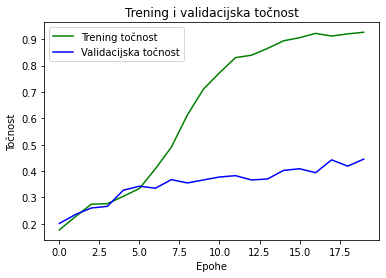

In [ ]:
#Evaluiranje točnosti za model

#vraćamo listu rezultata na trening i testnim podacima za svaku epohu

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc)) #za dobivanje broja epoha u prethodnom testu

#Plotanje trening i testne točnosti po epohi
plt.plot(epochs, acc, 'g', label='Trening točnost')
plt.plot(epochs, val_acc, 'b', label='Validacijska točnost')
plt.title('Trening i validacijska točnost')
plt.xlabel('Epohe')
plt.ylabel('Točnost')
plt.legend()
plt.show


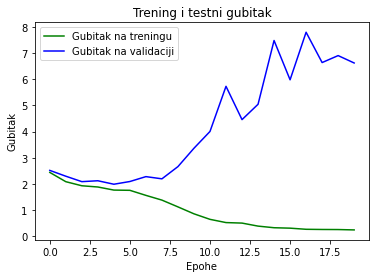

In [ ]:
#Evaluiranje gubitka za model

#vraćamo listu rezultata na trening i testnim podacima za svaku epohu

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#Plotanje trening i testnog gubitka po epohi
plt.plot(epochs, loss, 'g', label='Gubitak na treningu')
plt.plot(epochs, val_loss, 'b', label='Gubitak na validaciji')
plt.title('Trening i testni gubitak')
plt.xlabel('Epohe')
plt.ylabel('Gubitak')
plt.legend()
plt.show()

##Model 3 

Za Model 3 dodao sam još dva veća konvolucijska sloja i maknuo jedan prethodno dodani dropout. Broj parametara je još malo pao spram drugog modela.

In [ ]:
#Kreiranje modela #3

import tensorflow as tf

#kreiranje modela (prvo dodajemo par konvolucijskih slojeva, potom "flattenamo")
#rezultat kako bi ga predali u dense slojeve


model = tf.keras.models.Sequential([
    #slike su veličine 120x120 (kako smo pretvorili) sa 3 bytea(tj u boji)
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape=(120,120,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    #flattenamo rezultate kako bi ih predali Dense sloju
    tf.keras.layers.Flatten(),
    #skriveni sloj sa 256 neurona
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    #16 output neurona pošto imamo 16 klasa u trening/testu
    tf.keras.layers.Dense(16, activation='softmax')
])

model.summary() #ispisuje nam podatke o kreiranoj mreži

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 118, 118, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 59, 59, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 57, 57, 32)        4640      
                                                                 
 conv2d_20 (Conv2D)          (None, 55, 55, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 27, 27, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 25, 25, 64)       

Za potrebe trećeg modela promijenio sam optimizator, ne koristim više Adam već pokušavam sa RMSprop optimizatorom.

In [ ]:
from tensorflow.keras.optimizers import RMSprop

optimizer = keras.optimizers.RMSprop(learning_rate=0.0001)
loss_func = keras.losses.CategoricalCrossentropy()

model.compile(optimizer = optimizer,
              loss = loss_func,
              metrics=['accuracy']) #mjerenje točnosti

Poduplao sam broj koraka po epohi, a pritom malo smanjio validacijske korake. Broj epoha je sada 50 tj. najduže ćemo trenirati do sada.

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100, #koliko puta će se batch dodijeliti mreži u svakoj epohi
                    epochs=50,
                    validation_steps=20, #isto kao i steps per epoch samo na testnim podacima
                    )

Epoch 1/50
100/100 [==============================] - 12s 113ms/step - loss: 2.5008 - accuracy: 0.1441 - val_loss: 2.6659 - val_accuracy: 0.0312
Epoch 2/50
100/100 [==============================] - 12s 117ms/step - loss: 2.2197 - accuracy: 0.2072 - val_loss: 2.5096 - val_accuracy: 0.1594
Epoch 3/50
100/100 [==============================] - 12s 120ms/step - loss: 2.0403 - accuracy: 0.2581 - val_loss: 2.2836 - val_accuracy: 0.2109
Epoch 4/50
100/100 [==============================] - 11s 114ms/step - loss: 1.8144 - accuracy: 0.3400 - val_loss: 2.3273 - val_accuracy: 0.2719
Epoch 5/50
100/100 [==============================] - 11s 110ms/step - loss: 1.4199 - accuracy: 0.5188 - val_loss: 2.7893 - val_accuracy: 0.2609
Epoch 6/50
100/100 [==============================] - 11s 115ms/step - loss: 1.0338 - accuracy: 0.6641 - val_loss: 2.8786 - val_accuracy: 0.3891
Epoch 7/50
100/100 [==============================] - 11s 113ms/step - loss: 0.7994 - accuracy: 0.7525 - val_loss: 3.3991 - val_ac

##Komentar Modela 3

Vidimo da je do overfittanja ponovo došlo, ipak ovdje se točnost još malo popravila, te smo došli do cca 50% točnosti u pojedinim trenucima na validacijskom skupu.

##Plotanje grafova točnosti i gubitka za Model 3

Grafovi su prema očekivanjima, slični kao i prethodni s malo većim oscilacijama možda, u principu "bolje" , ali i dalje problem ostaje.

<function matplotlib.pyplot.show(*args, **kw)>

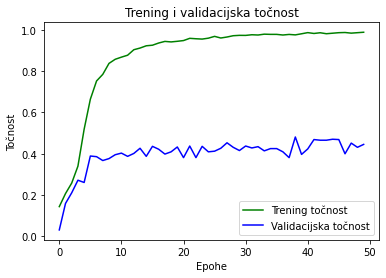

In [ ]:
#Evaluiranje točnosti za model

#vraćamo listu rezultata na trening i testnim podacima za svaku epohu

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc)) #za dobivanje broja epoha u prethodnom testu

#Plotanje trening i testne točnosti po epohi
plt.plot(epochs, acc, 'g', label='Trening točnost')
plt.plot(epochs, val_acc, 'b', label='Validacijska točnost')
plt.title('Trening i validacijska točnost')
plt.xlabel('Epohe')
plt.ylabel('Točnost')
plt.legend()
plt.show


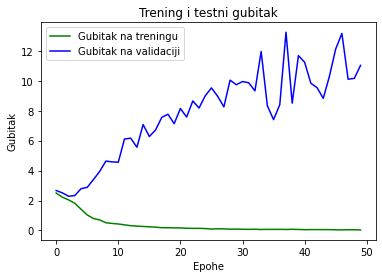

In [ ]:
#Evaluiranje gubitka za model

#vraćamo listu rezultata na trening i testnim podacima za svaku epohu

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#Plotanje trening i testnog gubitka po epohi
plt.plot(epochs, loss, 'g', label='Gubitak na treningu')
plt.plot(epochs, val_loss, 'b', label='Gubitak na validaciji')
plt.title('Trening i testni gubitak')
plt.xlabel('Epohe')
plt.ylabel('Gubitak')
plt.legend()
plt.show()

##Model 4 - VGG16 arhitektura

Za 4. model odlučio sam koristiti "predefiniranu" arhitekturu koju sam preuzeo s interneta i koja je rađena na principu VGG 16 mreže. Očekujem bolje rezultate pošto je ovo ipak jedna od najboljih arhitektura mreže koja se može postaviti, ali hoće li biti tako ?

Vidimo da je mreža znatno dublja i da su slojevi veći, a broj parametara mreže na kasnijem model.summary() je 10 do 50 puta veći od prethodnih mreža.

Dense slojevi su poduplani, a dropouta unutar ove implementacije nema.

In [ ]:
#Pokusaj sa VGG16 arhitekturom

import keras, os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(120,120,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=16, activation="softmax"))

Ponovo postavljam optimizator na Adam, a ovdje sam mijenjao i loss funkciju iz Categorical Crossentropy u Sparse Categorical Crossentropy, ali na kraju sam se vratio na prvotnu jer nikakvog pomaka nije bilo, čak je ustvari rezultat bio i lošiji. 

In [ ]:
from tensorflow import keras

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
loss_func = keras.losses.CategoricalCrossentropy()

model.compile(optimizer = optimizer,
              loss = loss_func,
              metrics=['accuracy']) #mjerenje točnosti

Smanjio sam batch_size za ovaj model sa 128 na 64.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#sve slike biti će reskalirane za 1/255
train_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size =64,
                                                    class_mode ='categorical',
                                                    target_size = (120, 120))

validation_generator = test_datagen.flow_from_directory(test_dir,
                                                        batch_size=64,
                                                        class_mode = 'categorical',
                                                        target_size = (120,120))

Found 15032 images belonging to 16 classes.
Found 5500 images belonging to 16 classes.


In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_95 (Conv2D)          (None, 120, 120, 64)      1792      
                                                                 
 conv2d_96 (Conv2D)          (None, 120, 120, 64)      36928     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 60, 60, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_97 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 conv2d_98 (Conv2D)          (None, 60, 60, 128)       147584    
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 30, 30, 128)      0         
 g2D)                                                

Razlika između koraka po epohi i validacijskih koraka je dosad najveća, kao i broj epoha.

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=100, #koliko puta će se batch dodijeliti mreži u svakoj epohi
                    epochs=100,
                    validation_steps=20, #isto kao i steps per epoch samo na testnim podacima
                    )

Epoch 1/100
100/100 [==============================] - 38s 317ms/step - loss: 2.2868 - accuracy: 0.1514 - val_loss: 2.3059 - val_accuracy: 0.0750
Epoch 2/100
100/100 [==============================] - 33s 327ms/step - loss: 1.8982 - accuracy: 0.2528 - val_loss: 2.0603 - val_accuracy: 0.2461
Epoch 3/100
100/100 [==============================] - 32s 323ms/step - loss: 1.6256 - accuracy: 0.3712 - val_loss: 3.1150 - val_accuracy: 0.3484
Epoch 4/100
100/100 [==============================] - 33s 326ms/step - loss: 0.8319 - accuracy: 0.7021 - val_loss: 6.8604 - val_accuracy: 0.3281
Epoch 5/100
100/100 [==============================] - 33s 323ms/step - loss: 0.2743 - accuracy: 0.9088 - val_loss: 7.4641 - val_accuracy: 0.3242
Epoch 6/100
100/100 [==============================] - 33s 327ms/step - loss: 0.1572 - accuracy: 0.9461 - val_loss: 7.5570 - val_accuracy: 0.3766
Epoch 7/100
100/100 [==============================] - 33s 328ms/step - loss: 0.1117 - accuracy: 0.9634 - val_loss: 10.8461 

KeyboardInterrupt: ignored

##Komentar Modela 4 

Nakon odrađenih 59 epoha od 100 predviđenih prekinuo sam izvršavanje modela jer sam vidio da daljnje izvršavanje neće donijeti nikakav pomak pošto se upravo s ovom mrežom dogodio najbrži overfitting do sada, pritom i najjači. Gubitak na trening skupu je pao praktički na 0, a točnost je dosegla 100%, dok je na validacijskom skupu gubitak nikad veći, a točnost je ostala u dosadašnjim razmjerima.

Za ovaj model nisam plotao grafove s obzirom da sam prekinuo izvršavanje, ali jasno je da bi grafovi izgledali najlošije do sada.

S obzirom da sam očekivao najbolji rezultat s ovim modelom, podosta sam iznenađen krajnjim ishodom. Očito problem nije u samoj mreži i postavkama iste, već u samom skupu podataka.

##Zaključak

Nakon što sam koristio 4 finalna modela te prilikom testiranja još 10-ak "manjih" verzija tj. sitnih promjena na tim modelima, pri čemu se na svakom od tih modela neovisno o količini i vrsti promjena uvijek događao overfitting, jedini zaključak koji se može izvući iz navedenog je da nije problem u jednostavnosti/kompleksnosti mreže i korištenim hiperaparametrima već u samom skupu podataka. 

Naime, podaci unutar preuzetog skupa su kreirani "Data augmentationom" pri čemu su podaci na trening skupu znatno bolje kvalitete (rezolucija, kontrast, boje...) od onih u testnom skupu. Takav veliki nesrazmjer kvalitete podataka unutar trening i testnog skupa zasigurno ima utjecaja i na finalni rezultat.

Osim navedenog, ono što je najvjerojatnije uzrok stalnog overfittinga je premali trening uzorak podataka. Iako 15-ak tisuća slika u trening skupu i 5500 slika u testnom skupu djeluje kao pozamašna brojka, kao i zadovoljavajući omjer(75:25), to je očigledno nedovoljno trening podataka kako se ne bi događao overfitting za konkretni problem. Rješenje za taj problem bilo bi proširivanje podataka stvarnog trening skupa novim slikama, ili lakši i brži način - unutar koda dodatnim "Data Augmentationom". 

Posljednji problem  tj. razlog mogućeg overfittinga i relativno niske validacijske točnosti moguće da leži i u nesrazmjeru količine trening slika za pojedine klase trening skupa, kao i u ekstremno velikoj sličnosti samih klasa unutar skupa. Naime, iako je model podijeljen na 16 klasa, sve klase su neki oblik znakova za brzinu koji su svi vrlo slični (oblikom, bojama, veličinom itd.) tj. razlike od klase do klase su znatno manje od npr. klasifikacije mačke i psa ili konja i čovjeka.

Iako se događao stalni overfittig, zadovoljan sam odrađenim treniranjima i smatram da sam dosegao najveću moguću točnost što se može postići s ovim podacima bez dodatnog Data Augmentationa, a ona iznosi 48%. Data Augmentation svjesno nisam htio primjenjivati tj. otpočetka sam si zacrtao da ću raditi trening i test isključivo s podacima koje sam prvotno predao bez dodatnih manipulacija (osim potrebe skaliranja).

Smatram da bi Data Augmentation zasigurno smanjio ili u potpunosti rješio problem overfittinga, ali lako moguće da bi nepravilnim postavljanjem stvorio suprotni efekt tj "underfitting". Svakako mislim da bi se uz određenu dozu Data Augmentationa postigla nešto veća točnost na testnom skupu podataka, ali s obzirom na sve gore navedene probleme (sličnost, nesrazmjer kvalitete itd.) mislim da skok u točnosti ne bi bio značajan. 

##Dokumentacija

Korišteni dataset: https://www.kaggle.com/datasets/daniildeltsov/traffic-signs-gtsrb-plus-162-custom-classes

Pomoć pri pozivanju dataseta s Google Drive-a: https://www.youtube.com/watch?v=Gvwuyx_F-28

VGG16 model preuzet sa: https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c

Ostatak koda rađen je uz pomoć različitih materijala s predavanja i vježbi na E-učenju